## Machine Predictive Maintenance
## Capstone Two - Step Three: Pre-processing and Training Data Development

From the previous step, I've selected three independent variables: 'Process temperature [K]', 'Rotational speed [rpm]', and 'Tool wear [min]'. In this phase of the project, my primary focus will be on data preprocessing. This includes tasks such as normalizing and standardizing all the features in the dataset, as well as creating a validation set for our analysis. set.

The raw dataset can be obtained through the following link:

https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the updated data from the previous project, Capstone Two: EDA.
data = pd.read_csv('data02.csv', index_col=0)

In [3]:
data.head()

,Machine failure,Type,Process temperature [K],Tool wear [min],Rotational speed [rpm]
UID,,,,,
1,0,M,308.6,0,1551
2,0,L,308.7,3,1408
3,0,L,308.5,5,1498
4,0,L,308.6,7,1433
5,0,L,308.7,9,1408


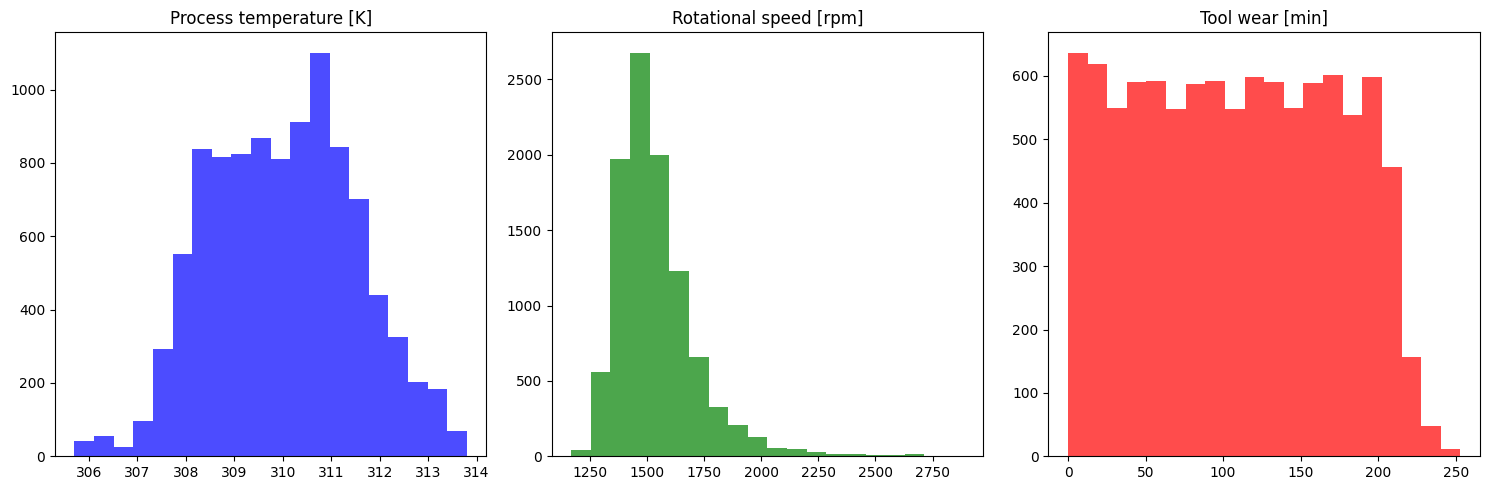

In [4]:
# Create a figure with subplots
plt.figure(figsize=(15, 5))

# Plot for Process temperature [K]
plt.subplot(131)
plt.hist(data['Process temperature [K]'], bins=20, color='blue', alpha=0.7)
plt.title('Process temperature [K]')

# Plot for Rotational speed [rpm]
plt.subplot(132)
plt.hist(data['Rotational speed [rpm]'], bins=20, color='green', alpha=0.7)
plt.title('Rotational speed [rpm]')

# Plot for Tool wear [min]
plt.subplot(133)
plt.hist(data['Tool wear [min]'], bins=20, color='red', alpha=0.7)
plt.title('Tool wear [min]')

plt.tight_layout()
plt.show()

### Pre-processing features

For feature 'Process temperature [K]' and 'Rotational speed [rpm]', I want to preserve the relative relationships between data points, so I will have them normalized between 0 and 1.

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the selected features for normalization
data['Temperature'] = scaler.fit_transform(data[['Process temperature [K]']])
data['Rotationalspeed'] = scaler.fit_transform(data[['Rotational speed [rpm]']])

data.drop(['Process temperature [K]', 'Rotational speed [rpm]'], axis=1, inplace=True)

For the 'Tool wear [min]' feature, given the time-centric nature of our maintenance prediction project, it's not necessary to normalize it. However, since the data ranges from 0 to over 250 minutes, I've decided to convert it from minutes to hours. This conversion not only maintains the time-related context but also makes the feature more easily interpretable within the context of the project.

In [6]:
# Convert 'Tool wear [min]' to 'Tool wear [hour]'

data['Tool wear [hour]'] = data['Tool wear [min]'] / 60
data.drop('Tool wear [min]', axis=1, inplace=True)

In [7]:
data.head()

,Machine failure,Type,Temperature,Rotationalspeed,Tool wear [hour]
UID,,,,,
1,0,M,0.358025,0.222934,0.000000
2,0,L,0.370370,0.139697,0.050000
3,0,L,0.345679,0.192084,0.083333
4,0,L,0.358025,0.154249,0.116667
5,0,L,0.370370,0.139697,0.150000


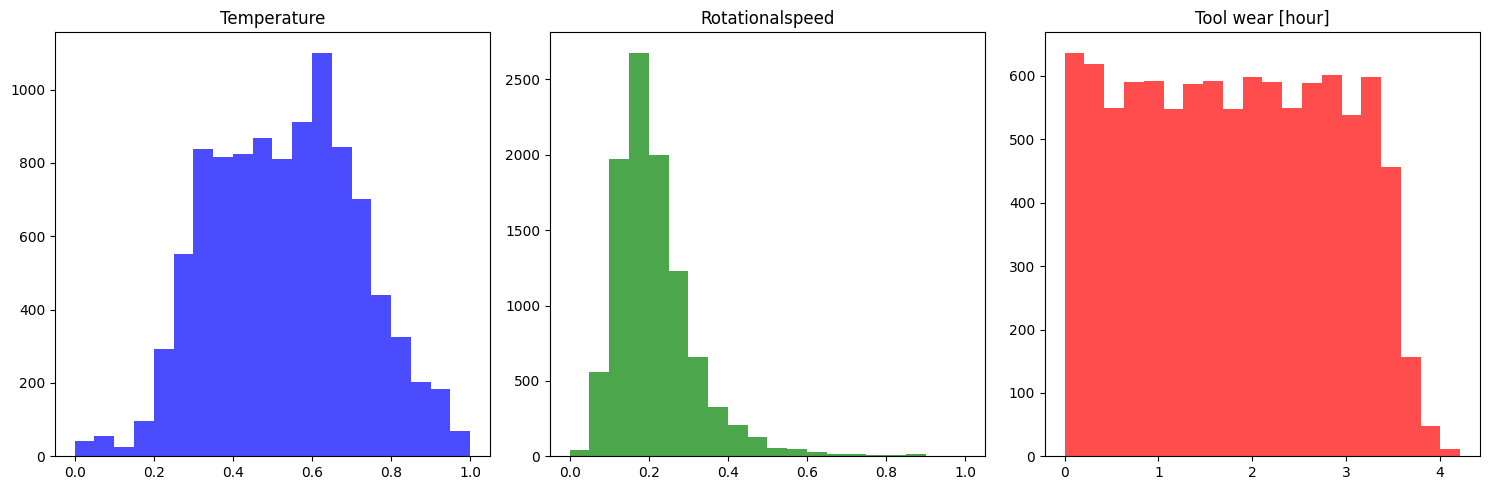

In [8]:
# Create a figure with subplots
plt.figure(figsize=(15, 5))

# Plot for Process temperature [K]
plt.subplot(131)
plt.hist(data['Temperature'], bins=20, color='blue', alpha=0.7)
plt.title('Temperature')

# Plot for Rotational speed [rpm]
plt.subplot(132)
plt.hist(data['Rotationalspeed'], bins=20, color='green', alpha=0.7)
plt.title('Rotationalspeed')

# Plot for Tool wear [min]
plt.subplot(133)
plt.hist(data['Tool wear [hour]'], bins=20, color='red', alpha=0.7)
plt.title('Tool wear [hour]')

plt.tight_layout()
plt.show()

After rescaling the three features, 'temperature' and 'Rotationalspeed' now have values ranging from 0 to 1, while 'Tool wear [hour]' ranges from 0 to 4+. There is no need to create dummy variables for these features in our future projects.

In [9]:
# Type' column is categorical data, and I used .get_dummies() to convert it into dummy variables

data = pd.get_dummies(data, columns=['Type'], drop_first=True)
data.head()

,Machine failure,Temperature,Rotationalspeed,Tool wear [hour],Type_L,Type_M
UID,,,,,,
1,0,0.358025,0.222934,0.000000,0,1
2,0,0.370370,0.139697,0.050000,1,0
3,0,0.345679,0.192084,0.083333,1,0
4,0,0.358025,0.154249,0.116667,1,0
5,0,0.370370,0.139697,0.150000,1,0


### Training Data Development

In [10]:
from sklearn.model_selection import train_test_split

# Define your features (independent variables) and target (dependent variable)
X = data[['Temperature', 'Rotationalspeed', 'Tool wear [hour]', 'Type_L', 'Type_M']]
y = data['Machine failure']

# Define the split point (80% of data for training, 20% for testing)
split_fraction = 0.8
split_index = int(len(data) * split_fraction)

# Split the data into training and validation sets
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Check the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 5)
X_test shape: (2000, 5)
y_train shape: (8000,)
y_test shape: (2000,)


In [11]:
# Save the training and testing sets to separate CSV files
X_train.to_csv('X_train.csv', index=True)
X_test.to_csv('X_test.csv', index=True)
y_train.to_csv('y_train.csv', index=True)
y_test.to_csv('y_test.csv', index=True)